In [1]:
ENV["PYTHONPATH"] = "/home/gridsan/aligho/.local/lib/python3.8/site-packages/PyNormaliz-2.15-py3.8-linux-x86_64.egg";

In [2]:
using Crystalline, MPBUtils, JLD2, LinearAlgebra, StaticArrays, SymmetryBases, PyPlot, DelimitedFiles, PrettyTables, 
Brillouin, PyCall, Statistics
np = pyimport("numpy")
using HDF5; 
include("./symeigs/corner_charges.jl")
include("./plotting_supercells.jl") # Utilities for plotting bulk crystal and cladding
include("./plotting_utilities.jl")
include("./symeigs/wyckoffs_dict.jl");
cm = 1/2.54;

In [7]:
# We check how things change with and without MPI
# Our unit cell is square R1 = (1, 0), R2= (0, 1)
# And our dielectric varies as |x| < 0.25 and |x| > 0.25

In [8]:
no_mpi_dir = "check_epsilon_shape/no-mpi/output/"
mpi_dir = "check_epsilon_shape/mpi/output/"
filename = "dim2-sg10-1-res64-tm-epsilon.h5"
check_no_mpi = h5open(no_mpi_dir*filename);
check_mpi = h5open(mpi_dir * filename);

In [9]:
Rs_no_mpi = read(check_no_mpi, "lattice vectors"); 
Rs_mpi = read(check_mpi, "lattice vectors"); 
eps_no_mpi = read(check_no_mpi, "data");
eps_mpi = read(check_mpi, "data");

In [10]:
Rs_no_mpi

3×3 Matrix{Float64}:
 1.0  6.12323e-17  0.0
 0.0  1.0          0.0
 0.0  0.0          1.0

In [11]:
Rs_mpi

3×3 Matrix{Float64}:
 6.12323e-17  1.0  0.0
 1.0          0.0  0.0
 0.0          0.0  1.0

In [12]:
Rsprime = [Rs_mpi[:, 1], Rs_mpi[:, 2]]
xyz = range(-5, 5, length=64)
X = broadcast((x,y) -> (x)*Rsprime[1][1] + (y)*Rsprime[2][1], reshape(xyz,(1, 64)), reshape(xyz, (64, 1)))
Y = broadcast((x,y) -> (x)*Rsprime[1][2] + (y)*Rsprime[2][2], reshape(xyz,(1, 64)), reshape(xyz, (64, 1)));

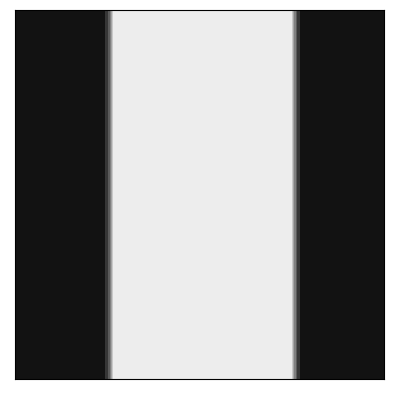

In [15]:
contourf(X, Y, eps_mpi, cmap="gray")
gca().set_aspect("equal")
xticks([])
yticks([]);

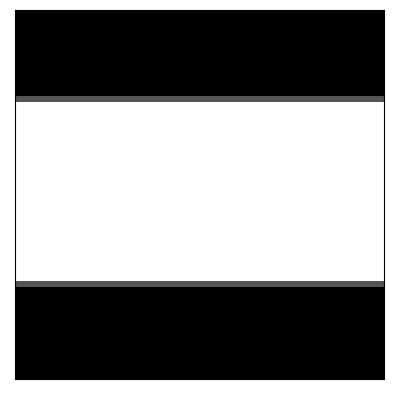

In [20]:
imshow(eps_mpi, origin="lower", cmap="gray")
xticks([])
yticks([]);

In [21]:
Rsprime = [Rs_no_mpi[:, 1], Rs_no_mpi[:, 2]]
xyz = range(-5, 5, length=64)
X = broadcast((x,y) -> (x)*Rsprime[1][1] + (y)*Rsprime[2][1], reshape(xyz,(1, 64)), reshape(xyz, (64, 1)))
Y = broadcast((x,y) -> (x)*Rsprime[1][2] + (y)*Rsprime[2][2], reshape(xyz,(1, 64)), reshape(xyz, (64, 1)));

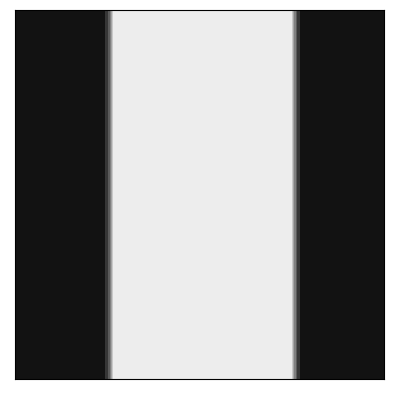

In [23]:
contourf(X, Y, eps_no_mpi, cmap="gray")
gca().set_aspect("equal")
xticks([])
yticks([]);

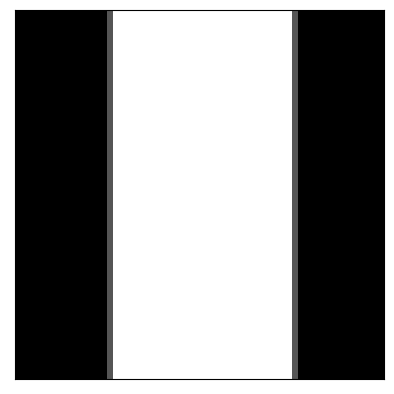

In [19]:
imshow(eps_no_mpi, origin="lower", cmap="gray")
xticks([])
yticks([]);

In [27]:
# So clearly, MPB with MPI switches R1 <-> R2 and the first dimension runs over columns and the second dimension runs over rows